Source: https://www.kaggle.com/narae78/the-nature-conservancy-fisheries-monitoring/fish-detection.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="dark")
%matplotlib inline

In [2]:
import cv2
import glob

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7f85ae4ef0>,
 <matplotlib.image.AxesImage at 0x7f7f85a7db38>)

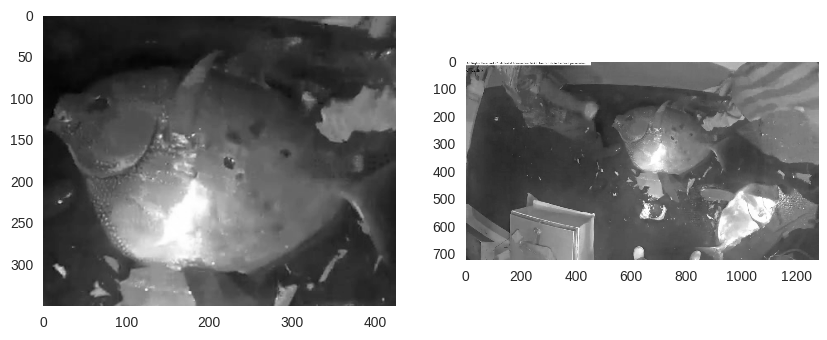

In [3]:
img_rows, img_cols = 350, 425
im_array = cv2.imread('../data/train/LAG/img_00091.jpg', 0)
# initialisation of the template
template = np.zeros([img_rows, img_cols], dtype='uint8')
# I try multiple times to find the correct rectangle. 
template[:, :] = im_array[100:450, 525:950]
#template /= 255.
plt.subplots(figsize=(10, 7))
plt.subplot(121), plt.imshow(template, cmap='gray') 
plt.subplot(122), plt.imshow(im_array, cmap='gray')

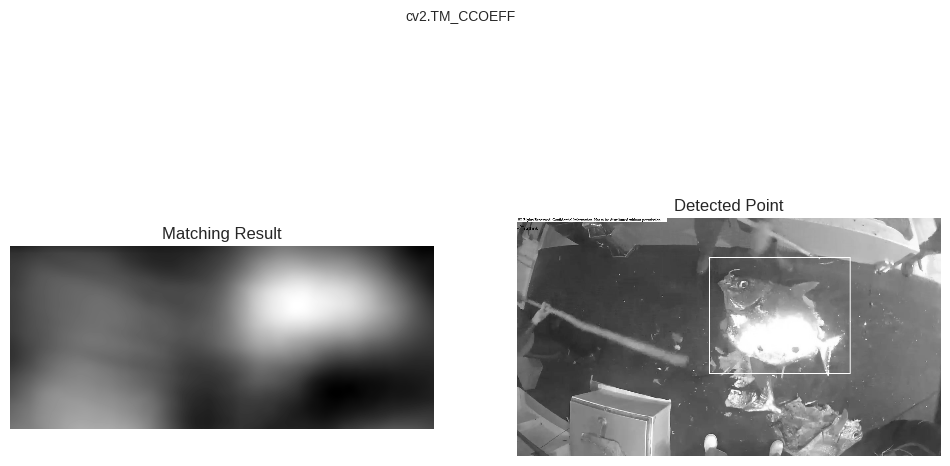

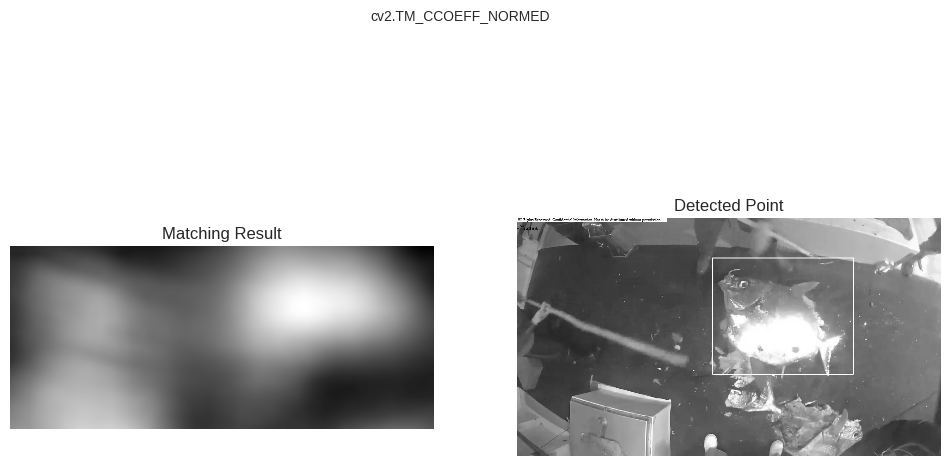

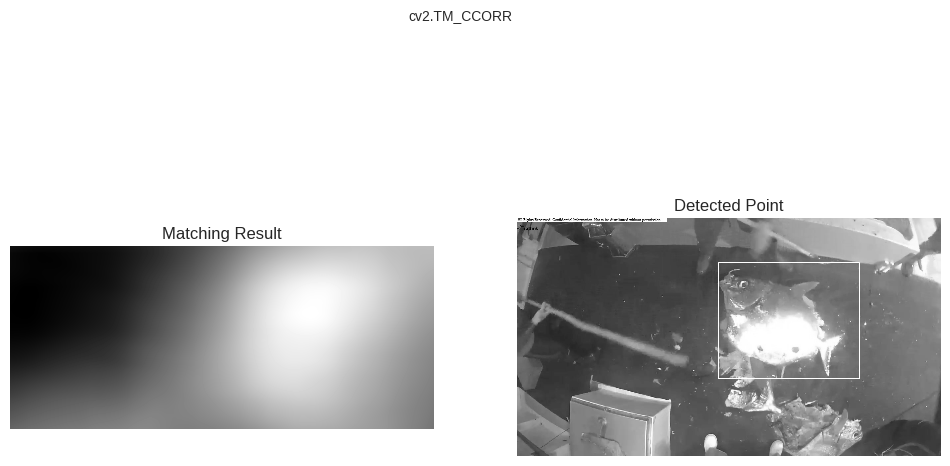

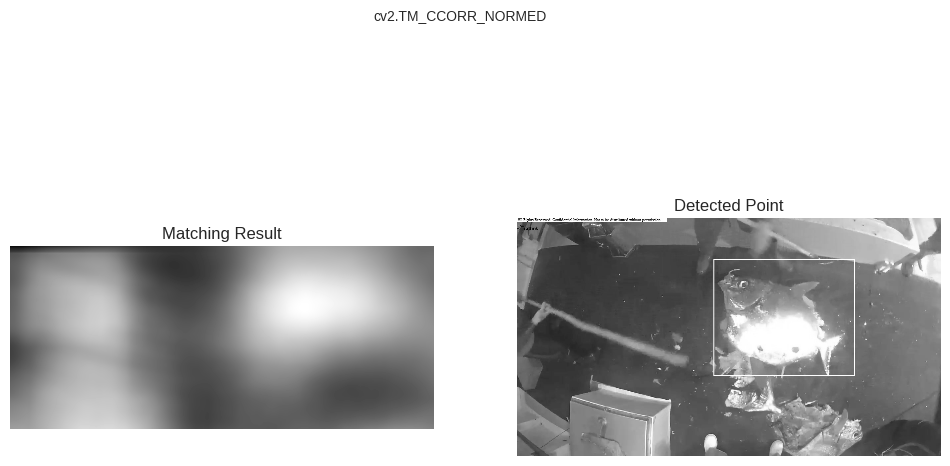

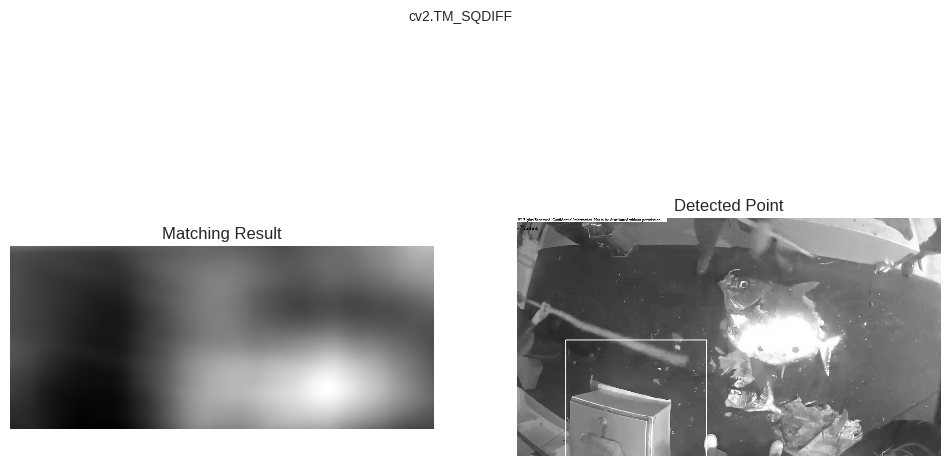

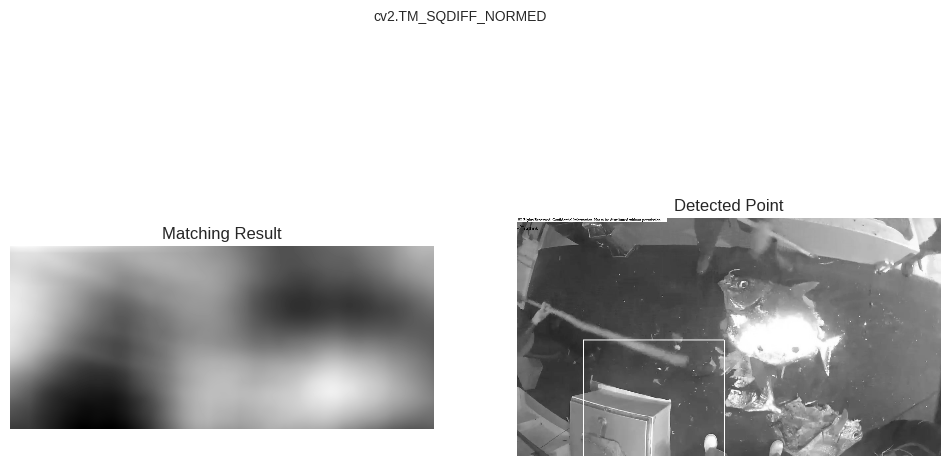

In [4]:
# http://docs.opencv.org/3.1.0/d4/dc6/tutorial_py_template_matching.html
file_name = '../data/train/LAG/img_01512.jpg' # img_00176,img_02758,img_01512
img2 = cv2.imread(file_name, 0) 
h, w = template.shape

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img, top_left, bottom_right, 255, 2)
    fig, ax = plt.subplots(figsize=(12, 7))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap='gray') #,aspect='auto'
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

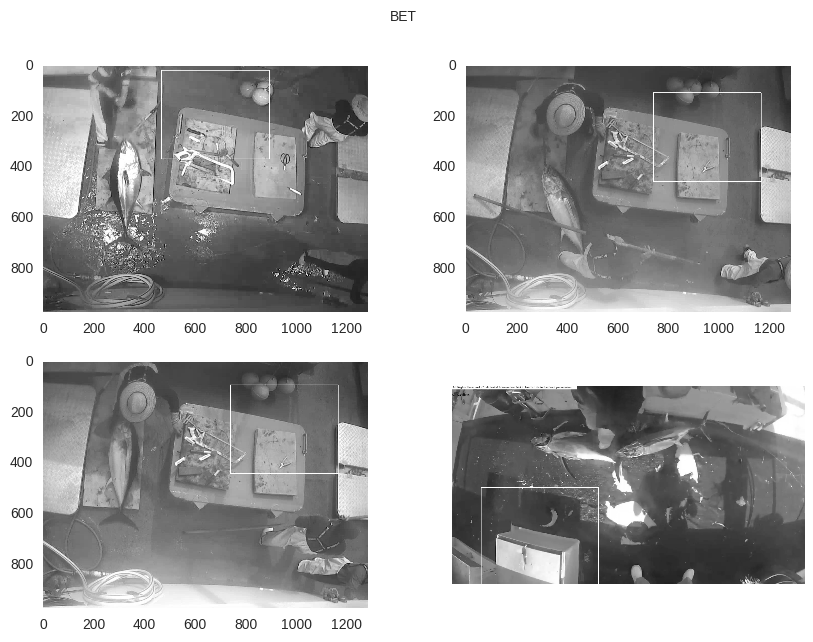

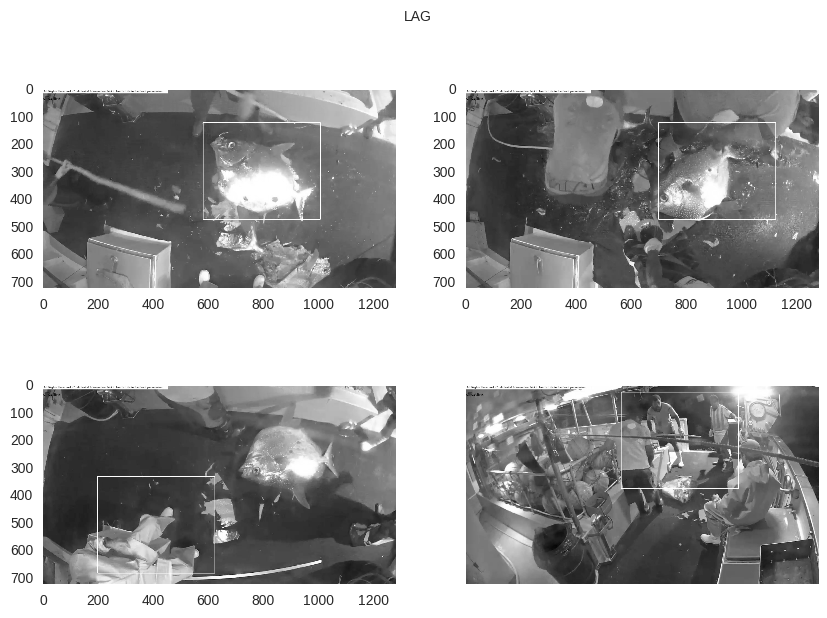

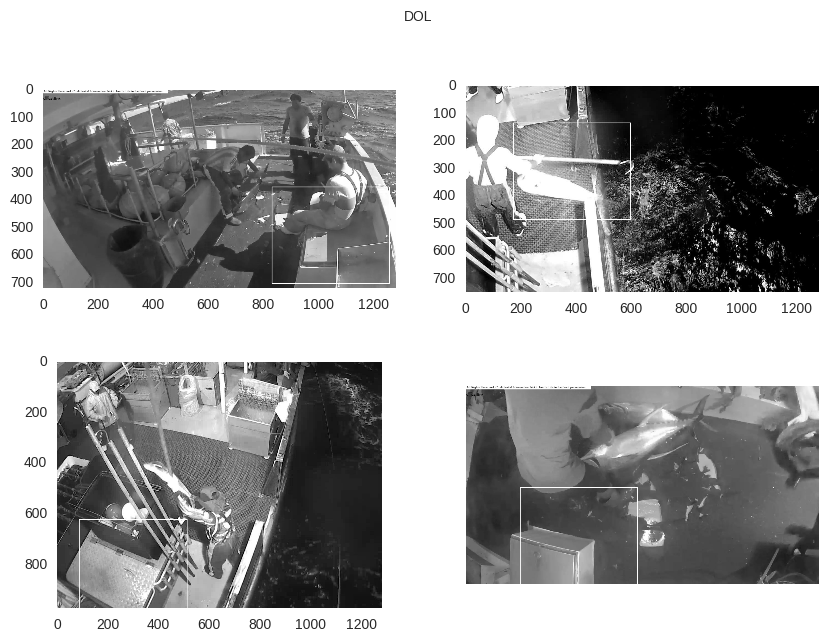

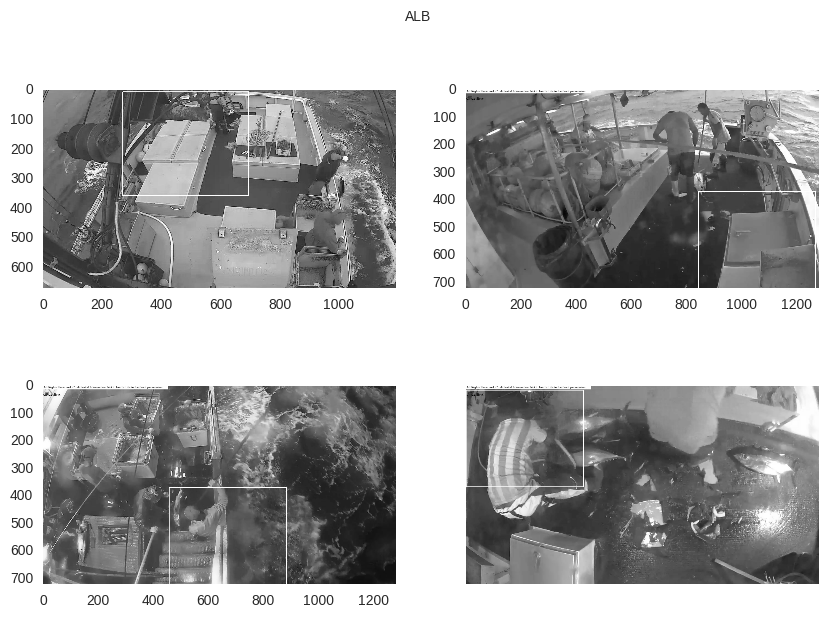

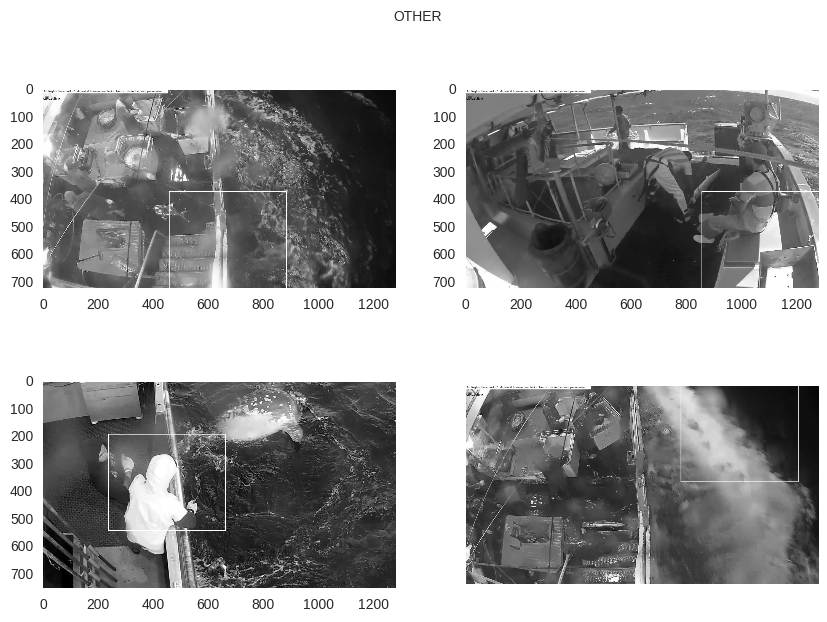

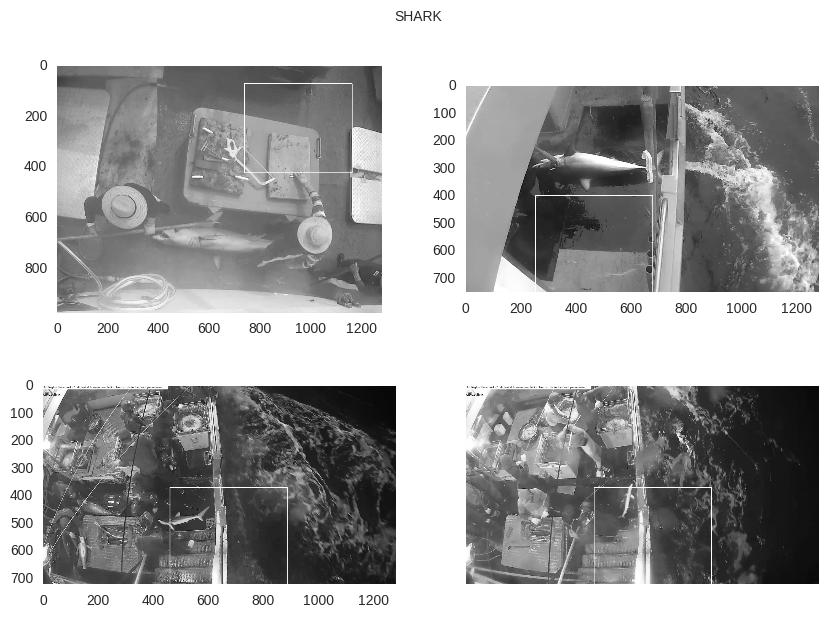

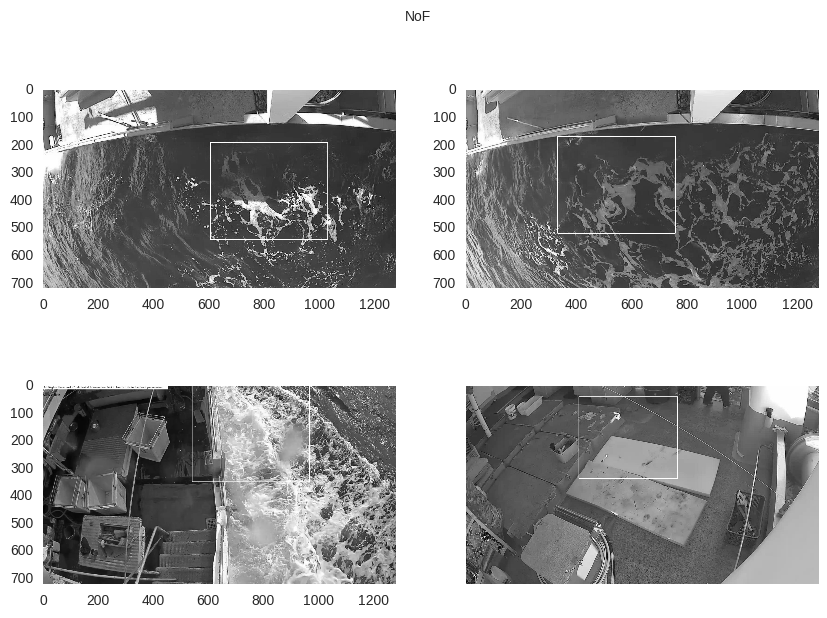

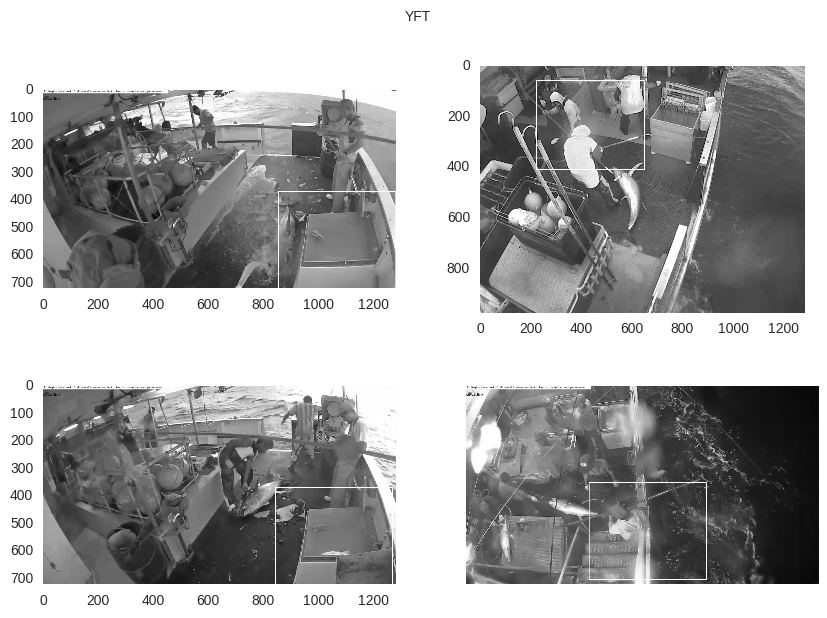

In [5]:
method = eval('cv2.TM_CCOEFF')
indexes=[1,30,40,5]

train_path = "../data/train/"
sub_folders = [full_path.split("/")[-1] for full_path in
               glob.glob("../data/train/*")]
for sub_folder in sub_folders:
    file_names = glob.glob(train_path + sub_folder + "/*")
    _, ax = plt.subplots(2, 2, figsize=(10, 7))
    for k in range(4):
        # I take only 4 images of each group. 
        file_name = file_names[indexes[k]]
        img = cv2.imread(file_name, 0)
        h, w = template.shape
        # Apply template Matching
        res = cv2.matchTemplate(img, template, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
 
        cv2.rectangle(img, top_left, bottom_right, 255, 2)
        if k == 0: 
            ax[0,0].imshow(img,cmap='gray')
            plt.xticks([]), plt.yticks([])
        if k == 1: 
            ax[0,1].imshow(img,cmap='gray')
            plt.xticks([]), plt.yticks([])
        if k == 2: 
            ax[1,0].imshow(img,cmap='gray')
            plt.xticks([]), plt.yticks([])
        if k == 3: 
            ax[1,1].imshow(img, cmap='gray')
            plt.xticks([]), plt.yticks([])
    
    plt.suptitle(sub_folder)
    plt.show()

### Remark :
As we can see, with a LAG template, we almost find all the LAG fish. This is good point. 
The other good point is that we don't find in our rectangle the other fish. Now the idea is to create the other template and do it for all the images. 
